In [316]:
# Exploring the book ratings dataset

In [317]:
%matplotlib inline
import pandas as pd
import re
import seaborn as sns
path='/home/kliton/Documents/Springboard/Capstone/BookRatings/BX-CSV-Dump/'
#import urllib3;
#from bs4 import BeautifulSoup
#import certifi


Loading the dataset:

In [318]:
import csv
bx_users = pd.read_csv(path+'BX-Users.csv', quotechar='"', 
                       na_values='NULL', quoting=csv.QUOTE_ALL,  
                       sep=";", encoding='iso-8859-1' )
bx_books = pd.read_csv(path+'BX-Books.csv', quotechar='"', na_values='NULL', 
                       quoting=csv.QUOTE_ALL,  sep=";", encoding='iso-8859-1', escapechar='\\')
bx_ratings = pd.read_csv(path+'BX-Book-Ratings.csv', quotechar='"', na_values='NULL', quoting=csv.QUOTE_ALL,  sep=";", encoding='iso-8859-1' )

In [319]:
path2 = '/home/kliton/Documents/Springboard/Capstone/BookRatings/' 
#BookInfo = pd.read_csv(path2+'BookInfoClean.csv')
BookInfo = pd.read_csv(path2 + 'BkProcessed.csv')

/home/kliton/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,46,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploring the data

In [320]:
BookInfo.head()


,Unnamed: 0,Unnamed: 0.1,authors,by_statement,contributions,contributors,coverimage,covers,created.type,created.value,...,uris,url,weight,work_title,work_titles,works,isbn10,average_rating,average_rating_sd,dewey_parsed
0,0,0,NaN,edited by Stephanie Newell.,"['Newell, Stephanie, 1968-']",NaN,NaN,"[4872475, 4872461, 3858348, 3858328]",/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/description/hol055...,['http://www.loc.gov/catdir/description/hol055...,NaN,NaN,NaN,NaN,"['1856494497', '1856494500']",3.00,0.0,820
1,1,0,[{'key': '/authors/OL230045A'}],Mario Bencastro.,NaN,NaN,NaN,[1882676],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL1919075W'}],['1558851941'],3.80,NaN,863
2,3,0,[{'key': '/authors/OL244070A'}],by Robb Armstrong.,NaN,NaN,NaN,"[3857941, 3857863]",/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL2021805W'}],"['0060275278', '0064420477']",4.00,0.0,Fictional
3,4,0,[{'key': '/authors/OL24054A'}],Sandra Belton.,NaN,NaN,NaN,[3857889],/type/datetime,2008-04-01T03:28:50.625462,...,NaN,NaN,NaN,NaN,NaN,[{'key': '/works/OL16070305W'}],['0689808461'],3.57,NaN,Fictional
4,5,0,[{'key': '/authors/OL18073A'}],by Robert Kraus ; pictures by Jose Aruego & Ar...,"['Aruego, Jose, ill.', 'Dewey, Ariane, ill.']",NaN,NaN,"[1065268, 24175]",/type/datetime,2008-04-01T03:28:50.625462,...,['http://www.loc.gov/catdir/description/hc041/...,['http://www.loc.gov/catdir/description/hc041/...,NaN,NaN,NaN,[{'key': '/works/OL407762W'}],"['0060262931', '006026294X']",3.47,NaN,Educational


In [321]:
BookInfo.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'authors', 'by_statement',
       'contributions', 'contributors', 'coverimage', 'covers', 'created.type',
       'created.value', 'description', 'description.type', 'description.value',
       'dewey_decimal_class', 'edition_name', 'first_sentence',
       'first_sentence.type', 'first_sentence.value', 'full_title', 'genres',
       'ia_loaded_id', 'isbn_10', 'isbn_13', 'languages', 'last_modified.type',
       'last_modified.value', 'latest_revision', 'lc_classifications', 'links',
       'location', 'notes', 'notes.type', 'notes.value', 'number_of_pages',
       'other_titles', 'pagination', 'physical_dimensions', 'physical_format',
       'publish_country', 'publish_date', 'publish_places', 'publishers',
       'revision', 'series', 'source_records', 'subject_place',
       'subject_places', 'subject_time', 'subject_times', 'subjects',
       'subtitle', 'table_of_contents', 'title', 'title_prefix',
       'translated_from', 'translation_of', 't

In [322]:
BnotNull = BookInfo[BookInfo.columns[1:65]].notnull()
newDF = pd.DataFrame()
for i in BnotNull.columns:
    newDF = pd.DataFrame.append(newDF, BnotNull[i].value_counts().sort_index()) #.pivot_table(index=BnotNull.columns, aggfunc=pd.Series.value_counts)
newDF.fillna(0,  inplace=True)
newDF['Total'] = newDF[0]+newDF[1]
newDF['Category']=newDF.index
newDF['Empty'] = newDF[0]
newDF

,True,False,Total,Category,Empty
Unnamed: 0.1,12190.0,0.0,12190.0,Unnamed: 0.1,0.0
authors,11401.0,789.0,12190.0,authors,789.0
by_statement,11536.0,654.0,12190.0,by_statement,654.0
contributions,3598.0,8592.0,12190.0,contributions,8592.0
contributors,17.0,12173.0,12190.0,contributors,12173.0
coverimage,2.0,12188.0,12190.0,coverimage,12188.0
covers,6940.0,5250.0,12190.0,covers,5250.0
created.type,11633.0,557.0,12190.0,created.type,557.0
created.value,11633.0,557.0,12190.0,created.value,557.0
description,45.0,12145.0,12190.0,description,12145.0


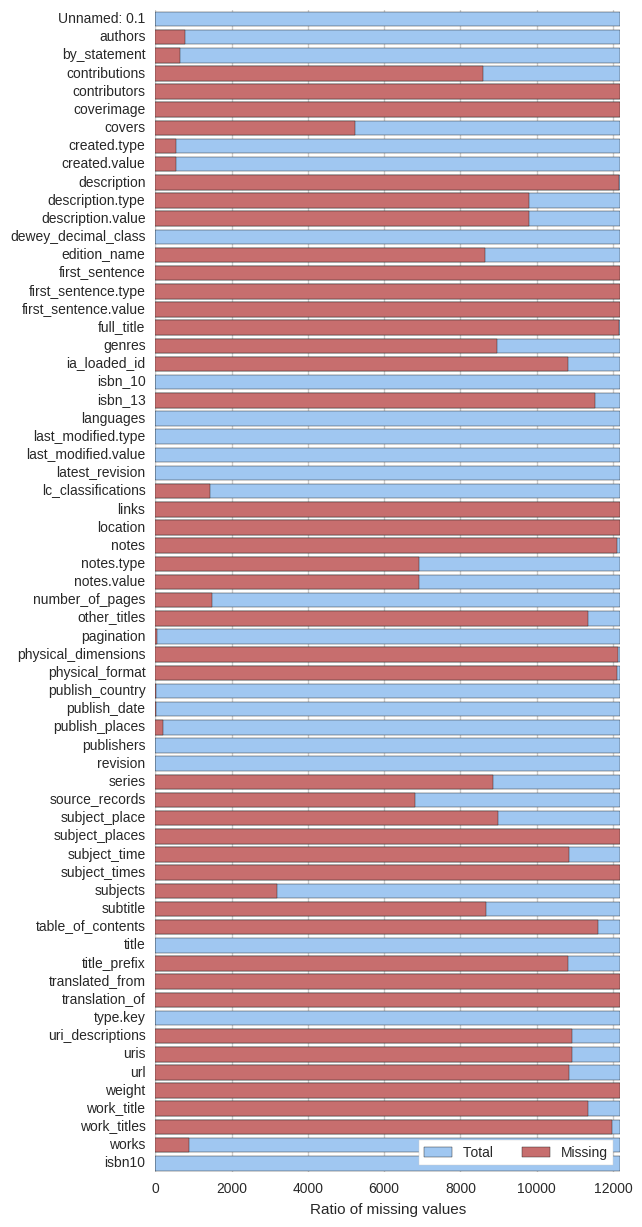

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Category", data=newDF,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Empty", y="Category", data=newDF,
            label="Missing", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 12190), ylabel="",
       xlabel="Ratio of missing values")
sns.despine(left=True, bottom=True)

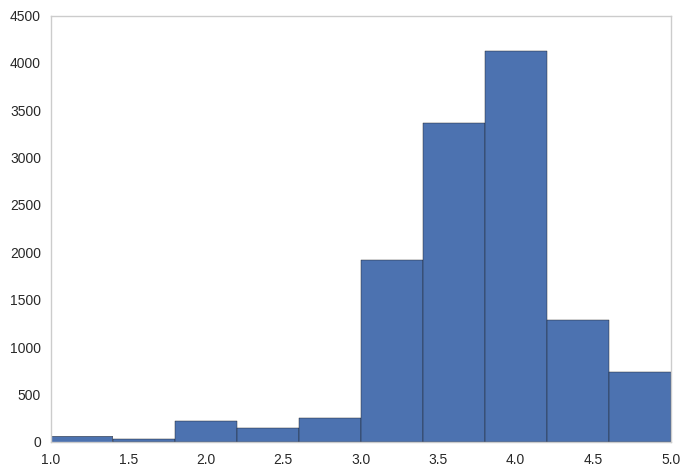

In [324]:
BookInfo.average_rating.hist(grid=False);

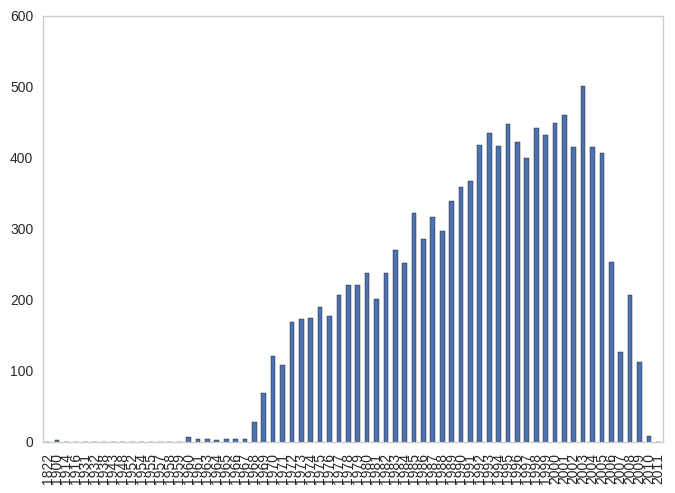

In [325]:
Dates = BookInfo.publish_date.str.findall('\d{4}') # need only the year, some records have the date
gr=pd.Series(data = [term for i in Dates for term in (i if type(i) == list else '' )]).value_counts().sort_index().plot(kind='bar', grid=False)
#sns.barplot(x=gr.index, y=gr.values, label='Number of books each year');

There seems to be a trend of rated books starting from year 1968. That trend has been increasing until 2007. And then dropped down. 

In [329]:
tl1 = BookInfo.languages.apply(lambda x: eval(x) if type(x)==str else x)
tl1 = tl1.apply(lambda x: x[0]['key'])
BookInfo['languagest'] = tl1.apply(lambda x: x.split(sep='/')[2])


In [330]:
counttable=BookInfo[['languagest', 'average_rating']].groupby('languagest').agg(['count', 'mean'])


In [331]:
#counttable.plot.scatter(x=counttable.index, y=counttable[[1]])

CTSorted = counttable.sort_values(by=[('average_rating', 'mean')])
#counttable
CTSorted

average_rating          
                    count      mean
languagest                         
por                    32  3.515000
fre                   182  3.671209
ger                    90  3.739444
eng                 11587  3.746493
spa                   231  3.764810
lat                     8  3.767500
ita                    47  3.857234
rus                     8  4.168750
dut                     5  4.620000

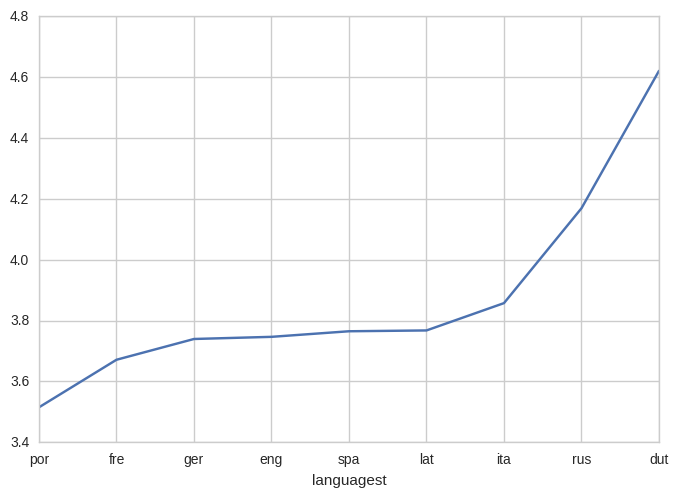

In [332]:
CTSorted[('average_rating', 'mean')].plot();

In [333]:
CTR = CTSorted.reset_index()
CTR.columns = pd.Index("_".join(i) for i in CTR.columns)

In [336]:
import math
CTR.columns =pd.Index(['language', 'average-rating-count', 'average-rating-mean'])
CTR['average-rating-count'].apply(lambda x: math.sqrt(x)) 

0      5.656854
1     13.490738
2      9.486833
3    107.642928
4     15.198684
5      2.828427
6      6.855655
7      2.828427
8      2.236068
Name: average-rating-count, dtype: float64

In [338]:

#CTR.plot.scatter('x', 'y')#(x='average-rating_count', y='average-rating-mean')#, s='average-rating-count')
#CTR.columns
#sns.swarmplot(x='language', y='average-rating-mean', data=CTR, size=CTR['average-rating-count'].apply(lambda x: math.log(x)));

In [339]:
len(list(CTR['language']))

9

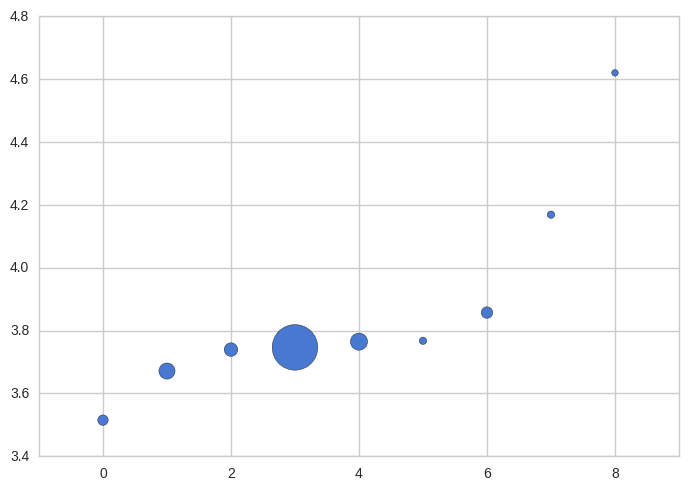

In [340]:
fig = plt.figure()

#ax.scatter(x='language', y='average-rating-mean', data=CTR, size=CTR['average-rating-count'].apply(lambda x: math.log(x)))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
ax.legend(CTR['language'])
ax.scatter(x=range(0,len(list(CTR['language']))), y=list(CTR['average-rating-mean']), s=10*CTR['average-rating-count'].apply(lambda x: math.sqrt(x)));

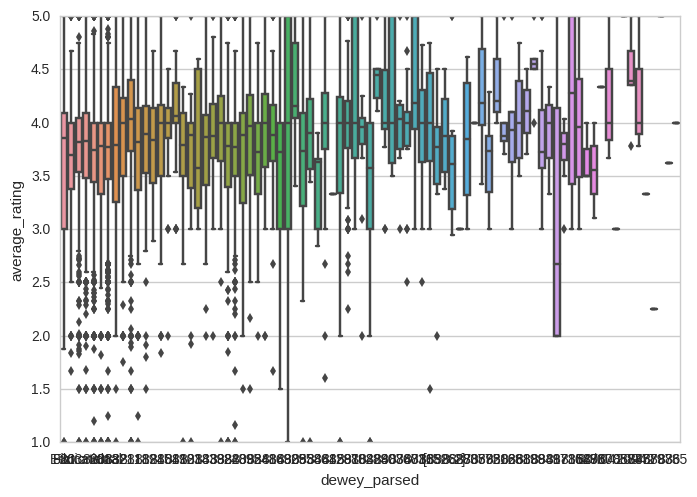

In [341]:
sns.boxplot(x='dewey_parsed', y = 'average_rating', data=BookInfo)

In [343]:
BookInfo.dewey_parsed.value_counts().tail()

885            1
836            1
845            1
80/.0420942    1
878            1
Name: dewey_parsed, dtype: int64

There are many genres that have less than 10 records. Let's filter those out and build the boxplot diagram again.

In [346]:
GenresCount = BookInfo.dewey_parsed.value_counts()
GenreCountGT10 = GenresCount[GenresCount > 10]
GenreAverage = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)][['dewey_parsed', 'average_rating']]

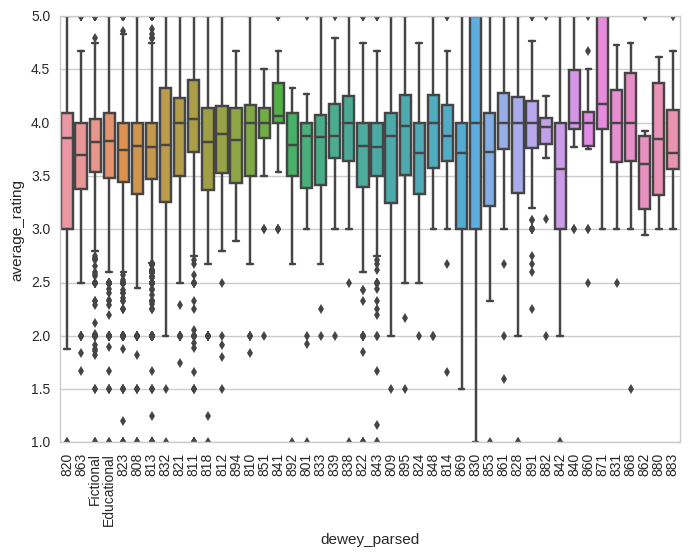

In [352]:
GenreRatingGR = sns.boxplot(x='dewey_parsed', y = 'average_rating', data=GenreAverage )
for item in GenreRatingGR.get_xticklabels():
    item.set_rotation(90)

In [ ]:
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

In [ ]:
type(Dates[0]) == list